In [1]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from letcon.src.utils.utils import get_data_statisics, get_missing_value_stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib.pyplot import xticks

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
# import sweetviz as sv
# import pandas_profiling as pp
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
TrainData = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')

In [3]:
TrainData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
TrainData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


.

__Manual EDA(Exploratory Data Analysis)__


1) Corelation HeatMap

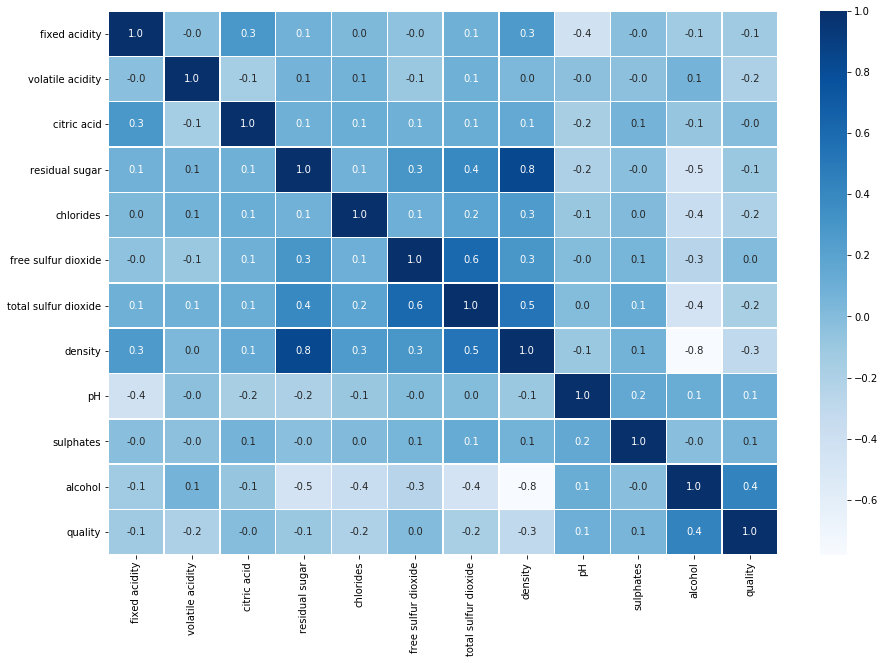

In [6]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(TrainData.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='Blues')

2) Visualizing Output y-variable using bar plot

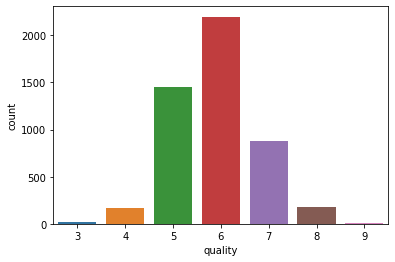

In [7]:
sns.countplot(x='quality', data=TrainData)

3) Analyze the distribution of data using swarm plot (fixed acidity vs qualoty)

Text(0.5, 1.0, 'fixed acidity vs quality')

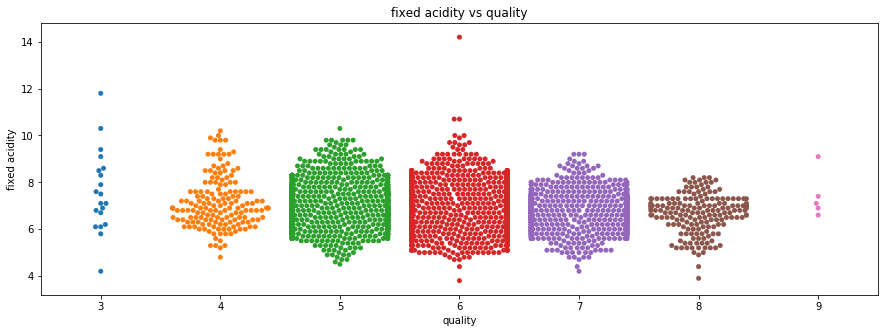

In [10]:
plt.figure(figsize = (15,5))
sns.swarmplot(x="quality", y="fixed acidity", data=TrainData)
plt.title("fixed acidity vs quality")

Text(0.5, 1.0, 'fixed acidity vs quality')

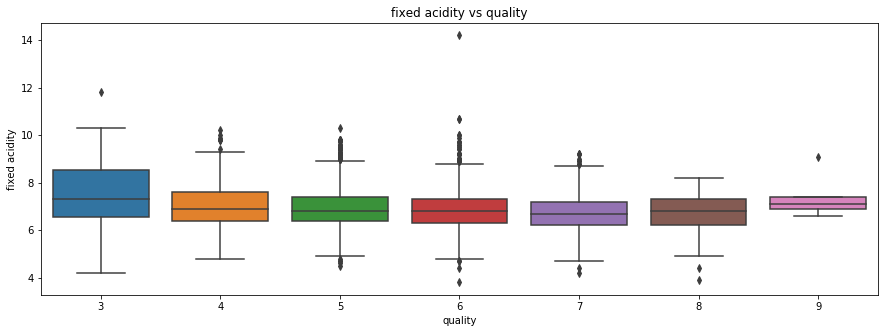

In [11]:
plt.figure(figsize = (15,5))
sns.boxplot(x="quality", y="fixed acidity", data=TrainData)
plt.title("fixed acidity vs quality")

4) Lets analyze MEAN behavious between fixed quality vs quality

Text(0, 0.5, 'fixed acidity')

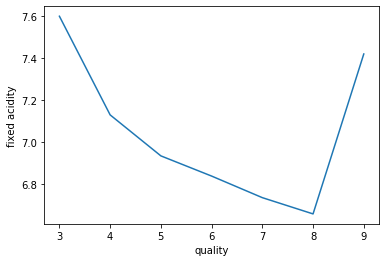

In [14]:
TrainData.groupby("quality")["fixed acidity"].mean().plot.line()
plt.ylabel("fixed acidity")

5) Analyzing data distribution barplot of quality and volatile acidity

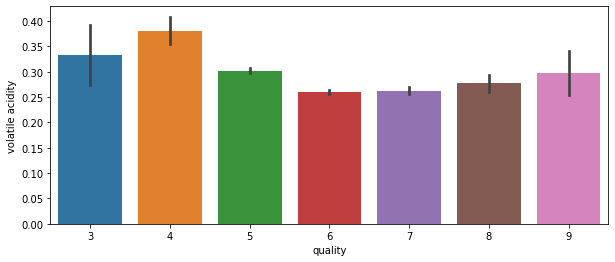

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(x='quality', y='volatile acidity', data=TrainData)